## Case Study: Data Cleaning and Preparation for the Hotel Booking Demand Dataset

### Objective
#### This case study demonstrates data cleaning techniques for the Hotel Booking Demand dataset, addressing typical real-world data issues and showcasing strategies to handle missing values, Outliers , inconsistent data, and more. By the end, readers will have practical insights into preparing data for reliable analysis.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rajka\.cache\kagglehub\datasets\jessemostipak\hotel-booking-demand\versions\1


In [3]:

# Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
actualData = pd.read_csv(r"C:\Users\rajka\.cache\kagglehub\datasets\jessemostipak\hotel-booking-demand\versions\1\hotel_bookings.csv")
data = actualData.copy()
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset: Kaggle’s "Hotel Booking Demand"

#### Dataset Overview
This dataset includes hotel booking information, with details on customer demographics, booking dates, room types, and pricing details for both city and resort hotels. It presents typical issues faced in real-world data, making it an ideal candidate for exploring a wide range of data cleaning concepts.

The dataset fields include:
- `hotel`: Type of hotel (Resort Hotel or City Hotel)
- `is_canceled`: Booking cancellation flag (1 if canceled, 0 otherwise)
- `lead_time`: Number of days between booking and arrival
- `arrival_date_year`: Year of arrival date
- `arrival_date_month`: Month of arrival date
- `country`: Country of origin of the guest
- `market_segment`: Segment for booking source (e.g., Direct, Corporate)
- `adults`: Number of adults
- `children`: Number of children
- `babies`: Number of babies
- `meal`: Type of meal booked
- `distribution_channel`: Booking distribution channel
- `is_repeated_guest`: Flag indicating if the guest has stayed before (1 for yes, 0 otherwise)
- `reserved_room_type`: Code of room type reserved
- `assigned_room_type`: Code of room type assigned
- `booking_changes`: Number of changes to the booking
- `deposit_type`: Type of deposit made (No Deposit, Non Refund, Refundable)
- `agent`: ID of the booking agent
- `company`: ID of the company for corporate bookings
- `days_in_waiting_list`: Number of days on the waiting list
- `adr`: Average Daily Rate (price per night)
- `reservation_status_date`: Date on which the reservation status was last updated


### Step 2: Basic Exploration and Summary
The **Hotel Booking Demand** dataset includes records of hotel reservations with details about customers, booking sources, and hotel types. The objective is to clean this data, addressing issues like missing values, data types, outliers, and more to improve the reliability of analysis.


In [6]:
# Basic Info and Summary Statistics
data.info()
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


**Summary statistics** help identify initial data quality issues, like missing values or odd distributions. The `.info()` function reveals data types and null values, while `.describe()` gives an overview of numerical values.


In [8]:
# Step 3: Handling Missing Values

# 3.1 Identifying Missing Values
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                        

Identifying missing values is a key step in data cleaning. Here, columns like `children`, `country` `company`, and `agent` contain missing data, which we’ll address based on their context.


In [10]:
# 3.2 Imputing or Dropping Missing Values
# Filling missing values for 'children' with 0 (assuming missing implies no children)
data['children'].fillna(0, inplace=True)

# Filling missing values in 'agent' and 'company' with 0 (indicating no agent or company involvement)
data['agent'].fillna(0, inplace=True)
data['company'].fillna(0, inplace=True)

# Drop rows with missing values in any critical column
data.dropna(subset=['country'], inplace=True)


C:\Users\rajka\AppData\Local\Temp\ipykernel_16732\2286941520.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(0, inplace=True)
C:\Users\rajka\AppData\Local\Temp\ipykernel_16732\2286941520.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

For `children`, we assume missing values imply no children were on the reservation and impute with `0`. For `agent` and `company`, we assume missing values indicate no associated agent or company, so we also fill with `0`. Rows missing critical fields, like `country`, are removed to maintain data integrity.


In [12]:
# Step 4: Dealing with Inconsistent Data

# 4.1 Handling Incorrect or Implausible Values
# Checking for any rows where the sum of 'adults', 'children', and 'babies' is zero
zero_guests = data[(data['adults'] + data['children'] + data['babies']) == 0]
print("Rows with zero total guests:\n", zero_guests)

# Drop rows with zero guests
data = data[(data['adults'] + data['children'] + data['babies']) > 0]


Rows with zero total guests:
                hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   


Rows with zero guests are logically incorrect since a reservation should include at least one guest. We removed such rows to ensure data accuracy.


In [14]:
# Step 5: Removing Duplicates
# Checking for duplicates
duplicates = data.duplicated().sum()
print("Total duplicates:", duplicates)

# Dropping duplicate rows
data.drop_duplicates(inplace=True)


Total duplicates: 31949


Duplicates, particularly in reservation data, could inflate metrics like demand and revenue. Here, we identified and removed duplicates to ensure accuracy.


In [16]:
# Step 6: Data Type Conversions

# Converting dates to datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Converting 'customer_type' and 'market_segment' to categorical types
data['customer_type'] = data['customer_type'].astype('category')
data['market_segment'] = data['market_segment'].astype('category')


Converting date fields to datetime format facilitates chronological analysis, while setting categorical fields (e.g., `customer_type`) as categories saves memory and speeds up processing.


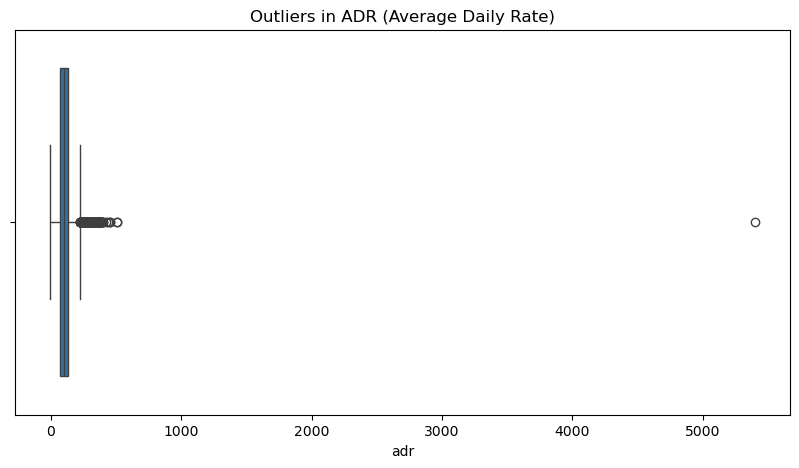

In [18]:
# Step 7: Handling Outliers

# Visualize 'adr' (average daily rate) to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['adr'])
plt.title("Outliers in ADR (Average Daily Rate)")
plt.show()

# Remove outliers in ADR using an upper threshold
upper_limit = data['adr'].quantile(0.95)
data = data[data['adr'] < upper_limit]


Outliers in `adr` (average daily rate) could reflect anomalies or special event prices. To improve analysis reliability, we removed values above the 95th percentile.


In [20]:
# Step 8: Encoding Categorical Variables

# Encoding 'hotel' and 'meal' using one-hot encoding
data = pd.get_dummies(data, columns=['hotel', 'meal'], drop_first=True)


Encoding categorical variables is essential for model compatibility. Here, `hotel` and `meal` were encoded using one-hot encoding, which transforms them into binary columns.


In [22]:
# Step 9: Normalization and Scaling

# Normalize 'lead_time' and 'days_in_waiting_list'
scaler = MinMaxScaler()
data[['lead_time', 'days_in_waiting_list']] = scaler.fit_transform(data[['lead_time', 'days_in_waiting_list']])


Normalization brings `lead_time` and `days_in_waiting_list` to a consistent scale, particularly useful for models that rely on similar feature ranges.


In [24]:
# Step 10: Feature Engineering

# Creating 'total_guests' feature
data['total_guests'] = data['adults'] + data['children'] + data['babies']

# Creating 'stay_duration' feature
data['stay_duration'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']


Feature engineering enhances data by adding new, insightful attributes. Here, `total_guests` represents the number of guests per booking, while `stay_duration` captures the total stay length.


In [26]:
# Step 11: Date-Based Features

# Extracting year and month from 'reservation_status_date'
data['reservation_year'] = data['reservation_status_date'].dt.year
data['reservation_month'] = data['reservation_status_date'].dt.month


Date-based features allow for temporal analysis. Extracting `year` and `month` from `reservation_status_date` enables seasonal trend analysis.


### Final Insights
By cleaning and transforming the dataset, we prepared it for reliable analysis and modeling. Each cleaning step contributes to data integrity and accuracy, addressing key challenges like missing values, duplicates, outliers, and inconsistent data.

This case study provides a comprehensive example of data cleaning and preparation using Python on a realistic dataset.
